In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file = 'Analysis.xlsx'

In [246]:
class PointMarker():
    def __init__(self, ax, point, **kwargs):
        self.ax = ax
        self.point = point
        if "cc" in kwargs:
            self.c = kwargs.get("cc")
            self.label = kwargs.get('label')
        else:
            self.c = kwargs.get("color", "b")
        self.ls=kwargs.get("linestyle", ':')
        self.vline, = self.ax.plot([],[],color=self.c,linestyle=self.ls, alpha=0.4)
        self.hline, = self.ax.plot([],[],color=self.c,linestyle=self.ls, label = self.label, alpha=0.6)
        self.draw()

    def draw(self):
        xmin = self.ax.get_xlim()[0]
        ymin = self.ax.get_ylim()[0]
        self.vline.set_data([self.point[0], self.point[0]], [ymin,self.point[1]])
        self.hline.set_data([xmin, self.point[0]], [self.point[1], self.point[1]])

class PointMarkers():
    pointmarkers = []
    def add(self,ax, point, **kwargs ):
        pm = PointMarker(ax, point, **kwargs)
        self.pointmarkers.append(pm)
    def update(self, event=None):
        for pm in self.pointmarkers:
            pm.draw()
            
def plotpoint(ax,point,cc,label):
    p = PointMarkers()
    p.add(ax,point, cc = cc, label = label, linestyle='--')
    ax.plot(point[0],point[1],'o', color = cc, alpha = 0.6, markersize =10)

# IRIS Dataset

In [302]:
data = pd.read_excel(file,sheet_name='IRIS', usecols = "B:F", header = None)

In [303]:
bonsai = data[1:4].values

In [304]:
protonn = data[11:14].values[:,:4]

In [305]:
bnc = data[16:19].values[:,[0,1,2]]

In [306]:
bnc

array([[ 22.    ,  10.    , 114.    ],
       [  0.52  ,   0.6052,   0.657 ],
       [  0.696 ,   0.6904,   0.66  ]])

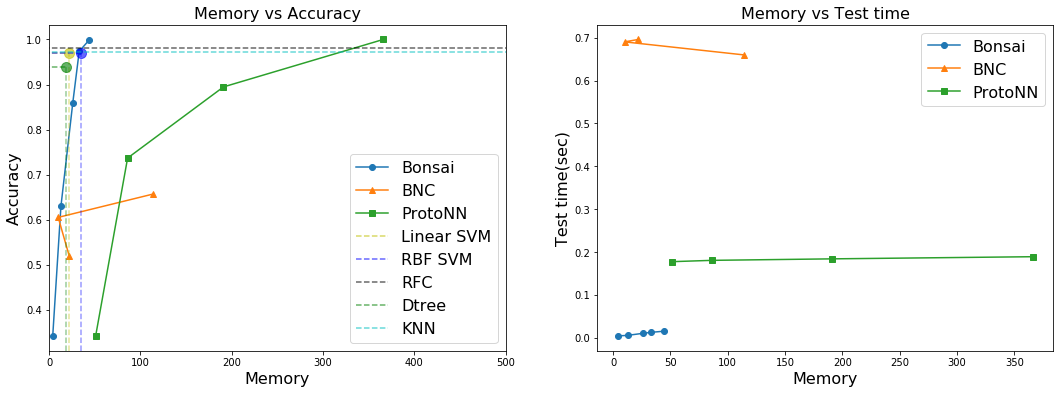

In [307]:
fig, ax = plt.subplots(1,2,figsize=[18,6])
ax[0].plot(bonsai[0,:],bonsai[1,:],'-o', label = 'Bonsai')
ax[0].plot(bnc[0,:],bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:],protonn[1,:],'-s', label = 'ProtoNN')
ax[0].set_title('Memory vs Accuracy',fontsize = 16)
ax[0].set_xlabel('Memory',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

plotpoint(ax[0],[22,0.97],'y','Linear SVM')
plotpoint(ax[0],[35,0.97],'b','RBF SVM')
plotpoint(ax[0],[538,0.98],'k','RFC')
plotpoint(ax[0],[19,0.94],'g','Dtree')
plotpoint(ax[0],[2009,0.9726],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(0,500)

ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
ax[1].plot(protonn[0,:],protonn[2,:],'-s', label = 'ProtoNN')

ax[1].set_title('Memory vs Test time',fontsize = 16)
ax[1].set_xlabel('Memory',fontsize = 16)
ax[1].set_ylabel('Test time(sec)',fontsize = 16)

# plotpoint(ax[1],[2200,0.97],'y','Linear SVM')
# plotpoint(ax[1],[3500,0.97],'b','RBF SVM')
# plotpoint(ax[1],[53800,0.98],'k','RFC')
# plotpoint(ax[1],[1900,0.94],'g','Dtree')
# plotpoint(ax[1],[20009,0.9726],'c','KNN')

# ax[1].set_xlim(0,500)
ax[1].legend(fontsize = 16)
plt.savefig('iris.png')
plt.show()

# MNIST Dataset

In [308]:
data = pd.read_excel(file,sheet_name='MNIST', usecols = "B:G", header = None)

In [309]:
bonsai = data[1:4].values[:,:4]

In [310]:
protonn = data[57:60].values[:,:4]
# protonn = np.concatenate([np.array([0.0,0.0,0.0]).reshape(3,1),protonn], axis = 1)

In [311]:
bnc = data[11:14].values[:,:5]

In [312]:
consai = data[16:19].values[:,:3]

In [313]:
consai

array([[2.057e+03, 1.008e+03, 1.700e+02],
       [9.100e-01, 9.248e-01, 8.640e-01],
       [4.400e-01, 4.100e-01, 3.970e-01]])

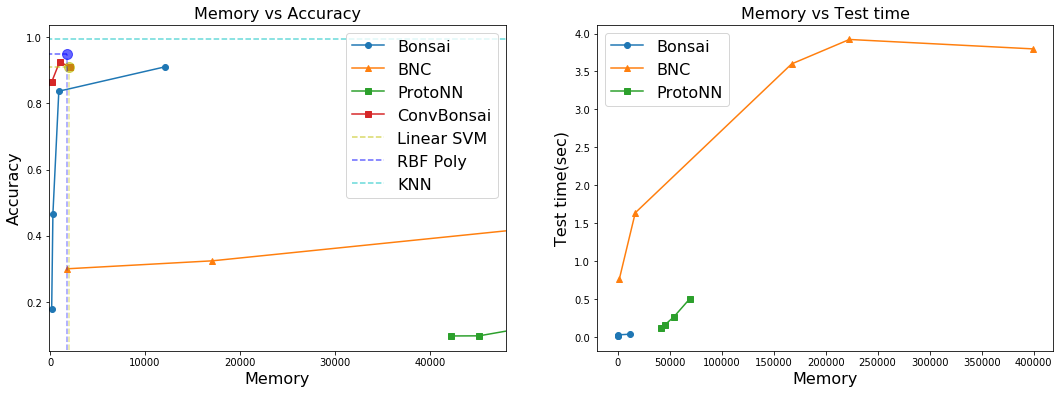

In [315]:
fig, ax = plt.subplots(1,2,figsize=[18,6])
ax[0].plot(bonsai[0,:],bonsai[1,:],'-o', label = 'Bonsai')
ax[0].plot(bnc[0,:],bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:],protonn[1,:],'-s', label = 'ProtoNN')
ax[0].plot(consai[0,:],consai[1,:],'-s', label = 'ConvBonsai')
ax[0].set_title('Memory vs Accuracy',fontsize = 16)
ax[0].set_xlabel('Memory',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

plotpoint(ax[0],[1953,0.908],'y','Linear SVM')
plotpoint(ax[0],[1749,0.95],'b','RBF Poly')
# plotpoint(ax[0],[700,0.8],'k','RFC')
# plotpoint(ax[0],[7840,0.88],'g','Dtree')
plotpoint(ax[0],[200900,0.9926],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(-100,48000)

ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
ax[1].plot(protonn[0,:],protonn[2,:],'-s', label = 'ProtoNN')
ax[1].legend(fontsize = 16)
ax[1].set_title('Memory vs Test time',fontsize = 16)
ax[1].set_xlabel('Memory',fontsize = 16)
ax[1].set_ylabel('Test time(sec)',fontsize = 16)


plt.savefig('mnist.png')


plt.show()

# USPS Dataset

In [316]:
data = pd.read_excel(file,sheet_name='USPS', usecols = "B:F", header = None)

In [317]:
bonsai = data[1:4].values[:,:5]

In [318]:
protonn = np.concatenate([np.array([0.0,0.0,0.0]).reshape(3,1),data[11:14].values[:,:4]], axis = 1)

In [319]:
protonn

array([[0.000e+00, 1.435e+04, 1.585e+04, 1.885e+04, 2.485e+04],
       [0.000e+00, 9.063e-01, 9.138e-01, 9.192e-01, 9.193e-01],
       [0.000e+00, 4.800e-02, 7.810e-02, 1.094e-01, 1.718e-01]])

In [320]:
bnc = data[16:19].values[:,:3]

In [321]:
# consai = data[16:19].values[:,:3]

In [322]:
bonsai

array([[1.573e+03, 5.620e+02, 2.210e+02, 8.400e+01, 1.800e+01],
       [9.347e-01, 9.000e-01, 7.710e-01, 3.840e-01, 1.788e-01],
       [3.160e-02, 2.100e-02, 1.530e-02, 1.040e-02, 9.000e-03]])

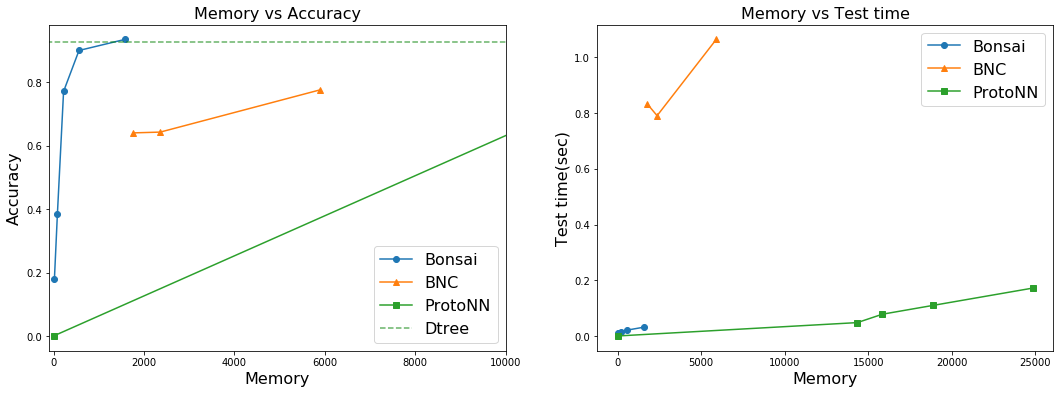

In [323]:
fig, ax = plt.subplots(1,2,figsize=[18,6])
ax[0].plot(bonsai[0,:],bonsai[1,:],'-o', label = 'Bonsai')
ax[0].plot(bnc[0,:],bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:],protonn[1,:],'-s', label = 'ProtoNN')
# ax[0].plot(consai[0,:],consai[1,:],'-s', label = 'ConvBonsai')
ax[0].set_title('Memory vs Accuracy',fontsize = 16)
ax[0].set_xlabel('Memory',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

# plotpoint(ax[0],[1953,0.908],'y','Linear SVM')
# plotpoint(ax[0],[1749,0.95],'b','RBF Poly')
# plotpoint(ax[0],[700,0.8],'k','RFC')
plotpoint(ax[0],[78400,0.926],'g','Dtree')
# plotpoint(ax[0],[200900,0.9926],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(-100,10000)

ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
ax[1].plot(protonn[0,:],protonn[2,:],'-s', label = 'ProtoNN')
ax[1].legend(fontsize = 16)
ax[1].set_title('Memory vs Test time',fontsize = 16)
ax[1].set_xlabel('Memory',fontsize = 16)
ax[1].set_ylabel('Test time(sec)',fontsize = 16)


plt.savefig('usps.png')


plt.show()

# notMNIST Dataset

In [330]:
data = pd.read_excel(file,sheet_name='notMNIST', usecols = "B:E", header = None)

In [331]:
bonsai = data[1:4].values[:,:4]

In [332]:
protonn = data[6:9].values[:,:4]
# protonn = np.concatenate([np.array([0.0,0.0,0.0]).reshape(3,1),protonn], axis = 1)

In [333]:
bnc = data[17:20].values[:,[0,2,1]]

In [334]:
consai = data[11:14].values[:,:4]

In [335]:
consai

array([[8.0210e+03, 1.3440e+03, 5.4100e+02, 1.5100e+02],
       [9.1000e-01, 8.9900e-01, 7.4140e-01, 4.7806e-01],
       [1.9000e-01, 7.9000e-02, 4.1000e-01, 4.0000e-01]])

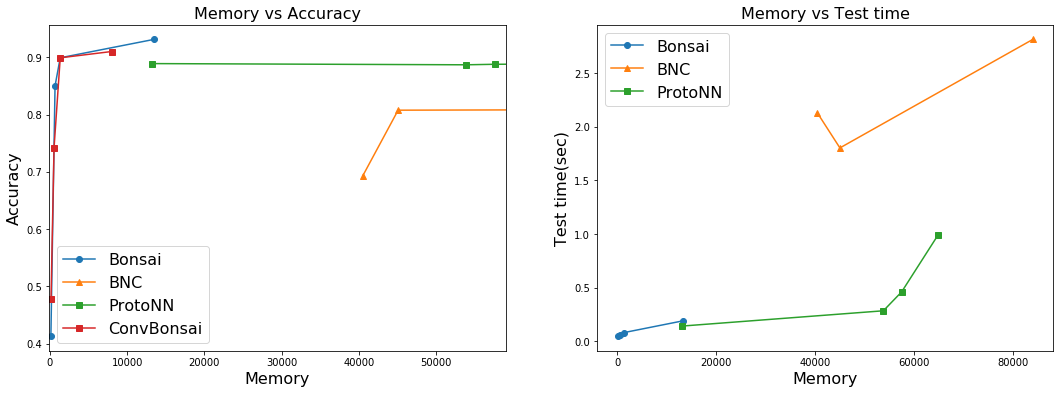

In [336]:
fig, ax = plt.subplots(1,2,figsize=[18,6])
ax[0].plot(bonsai[0,:],bonsai[1,:],'-o', label = 'Bonsai')
ax[0].plot(bnc[0,:],bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:],protonn[1,:],'-s', label = 'ProtoNN')
ax[0].plot(consai[0,:],consai[1,:],'-s', label = 'ConvBonsai')
ax[0].set_title('Memory vs Accuracy',fontsize = 16)
ax[0].set_xlabel('Memory',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

# plotpoint(ax[0],[1953,0.908],'y','Linear SVM')
# plotpoint(ax[0],[1749,0.95],'b','RBF Poly')
# # plotpoint(ax[0],[700,0.8],'k','RFC')
# # plotpoint(ax[0],[7840,0.88],'g','Dtree')
# plotpoint(ax[0],[200900,0.9926],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(-100,59000)

ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
ax[1].plot(protonn[0,:],protonn[2,:],'-s', label = 'ProtoNN')
ax[1].legend(fontsize = 16)
ax[1].set_title('Memory vs Test time',fontsize = 16)
ax[1].set_xlabel('Memory',fontsize = 16)
ax[1].set_ylabel('Test time(sec)',fontsize = 16)


plt.savefig('notmnist.png')


plt.show()

# madelon Dataset

In [337]:
data = pd.read_excel(file,sheet_name='MADELON', usecols = "B:E", header = None)

In [338]:
bonsai = data[6:9].values[:,:4]

In [339]:
protonn = data[1:4].values[:,:4]
# protonn = np.concatenate([np.array([0.0,0.0,0.0]).reshape(3,1),protonn], axis = 1)

In [340]:
# bnc = data[17:20].values[:,[0,2,1]]

In [341]:
# consai = data[11:14].values[:,:4]

In [342]:
consai

array([[8.0210e+03, 1.3440e+03, 5.4100e+02, 1.5100e+02],
       [9.1000e-01, 8.9900e-01, 7.4140e-01, 4.7806e-01],
       [1.9000e-01, 7.9000e-02, 4.1000e-01, 4.0000e-01]])

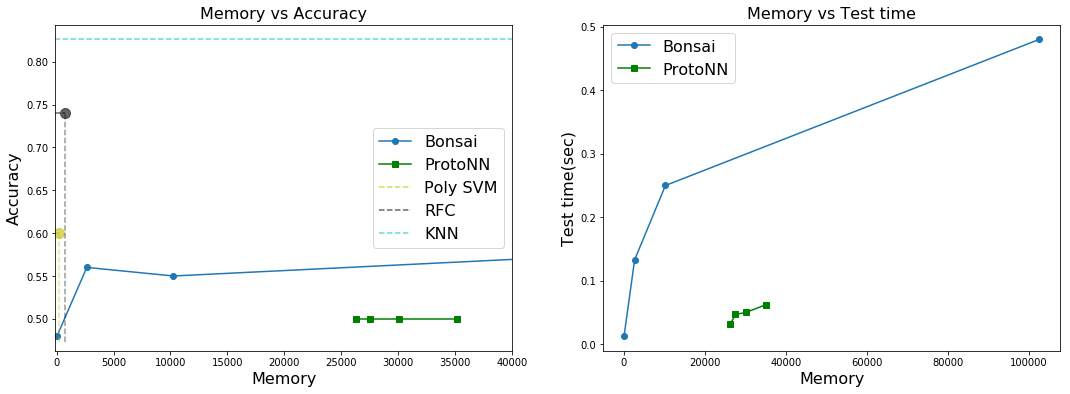

In [344]:
fig, ax = plt.subplots(1,2,figsize=[18,6])
ax[0].plot(bonsai[0,:],bonsai[1,:],'-o', label = 'Bonsai')
# ax[0].plot(bnc[0,:],bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:],protonn[1,:],'-gs', label = 'ProtoNN')
# ax[0].plot(consai[0,:],consai[1,:],'-s', label = 'ConvBonsai')
ax[0].set_title('Memory vs Accuracy',fontsize = 16)
ax[0].set_xlabel('Memory',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

plotpoint(ax[0],[195,0.6],'y','Poly SVM')
# plotpoint(ax[0],[1749,0.95],'b','RBF Poly')
plotpoint(ax[0],[700,0.74],'k','RFC')
# # plotpoint(ax[0],[7840,0.88],'g','Dtree')
plotpoint(ax[0],[200000,0.826],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(-100,40000)

ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
# ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
ax[1].plot(protonn[0,:],protonn[2,:],'-gs', label = 'ProtoNN')
ax[1].legend(fontsize = 16)
ax[1].set_title('Memory vs Test time',fontsize = 16)
ax[1].set_xlabel('Memory',fontsize = 16)
ax[1].set_ylabel('Test time(sec)',fontsize = 16)

plt.savefig('madelon.png')


plt.show()

# Cifar Dataset

In [345]:
data = pd.read_excel(file,sheet_name='CIFAR', usecols = "B:E", header = None)

In [346]:
bonsai = data[11:14].values[:,:3]

In [347]:
protonn = data[6:9].values[:,:4]
# protonn = np.concatenate([np.array([0.0,0.0,0.0]).reshape(3,1),protonn], axis = 1)

In [348]:
bnc = data[17:20].values[:,:3]

In [349]:
consai = data[1:4].values[:,:3]

In [350]:
consai

array([[1.6255e+04, 5.0730e+03, 2.1780e+03],
       [6.0000e-01, 4.3000e-01, 2.9000e-01],
       [8.8000e-01, 2.3000e-01, 2.1000e-01]])

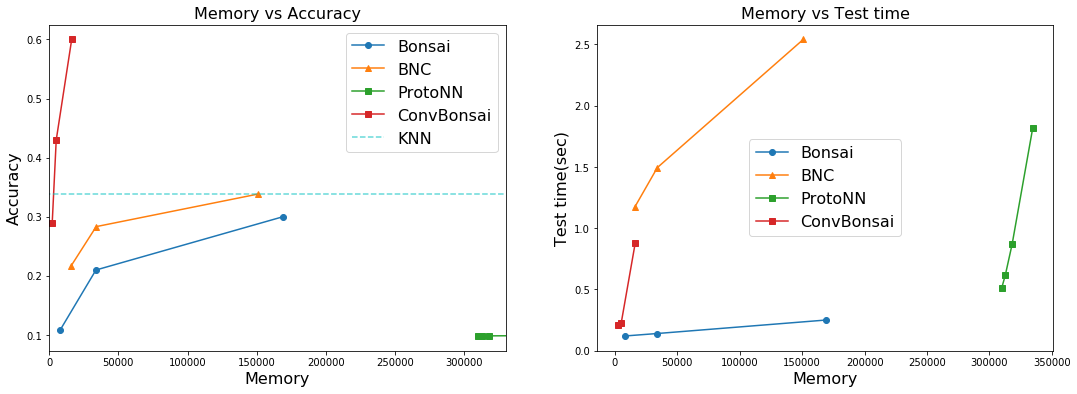

In [351]:
fig, ax = plt.subplots(1,2,figsize=[18,6])
ax[0].plot(bonsai[0,:],bonsai[1,:],'-o', label = 'Bonsai')
ax[0].plot(bnc[0,:],bnc[1,:],'-^', label = 'BNC')
ax[0].plot(protonn[0,:],protonn[1,:],'-s', label = 'ProtoNN')
ax[0].plot(consai[0,:],consai[1,:],'-s', label = 'ConvBonsai')
ax[0].set_title('Memory vs Accuracy',fontsize = 16)
ax[0].set_xlabel('Memory',fontsize = 16)
ax[0].set_ylabel('Accuracy',fontsize = 16)

# plotpoint(ax[0],[195,0.6],'y','Poly SVM')
# # plotpoint(ax[0],[1749,0.95],'b','RBF Poly')
# plotpoint(ax[0],[700,0.74],'k','RFC')
# # # plotpoint(ax[0],[7840,0.88],'g','Dtree')
plotpoint(ax[0],[2000000,0.338],'c','KNN')

ax[0].legend(fontsize = 16)
ax[0].set_xlim(-100,330000)

ax[1].plot(bonsai[0,:],bonsai[2,:],'-o', label = 'Bonsai')
ax[1].plot(bnc[0,:],bnc[2,:],'-^', label = 'BNC')
ax[1].plot(protonn[0,:],protonn[2,:],'-s', label = 'ProtoNN')
ax[1].plot(consai[0,:],consai[2,:],'-s', label = 'ConvBonsai')
ax[1].legend(fontsize = 16)
ax[1].set_title('Memory vs Test time',fontsize = 16)
ax[1].set_xlabel('Memory',fontsize = 16)
ax[1].set_ylabel('Test time(sec)',fontsize = 16)


plt.savefig('cifar.png')

plt.show()